# 1. Trying Auto-Arima

In [1]:
from prophet import Prophet
import pandas as pd
import plotly.graph_objects as go

In [2]:
df = pd.read_excel(r"C:\Users\serale\OneDrive - OMRON\Documents\AlexSerra\TFM_AlexSerra\TFM_MBD_2024_AlexSerra\data\Times_Series_Project_uoc.xlsx")

In [3]:
df_arima= df[["date", "sales_region1"]]
df_arima.columns=["ds", "y"]

In [4]:
df_arima.set_index('ds', inplace=True)

In [5]:
df_arima_cut= df_arima.iloc[:-10]

In [6]:
df_arima

,y
ds,
2020-01-06,0.680314
2020-01-13,1.469124
2020-01-20,0.948362
2020-01-27,0.885640
2020-02-03,1.686237
...,...
2023-06-05,0.578091
2023-06-12,0.778230
2023-06-19,0.654510


In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df_arima['y'])
#results.plot()

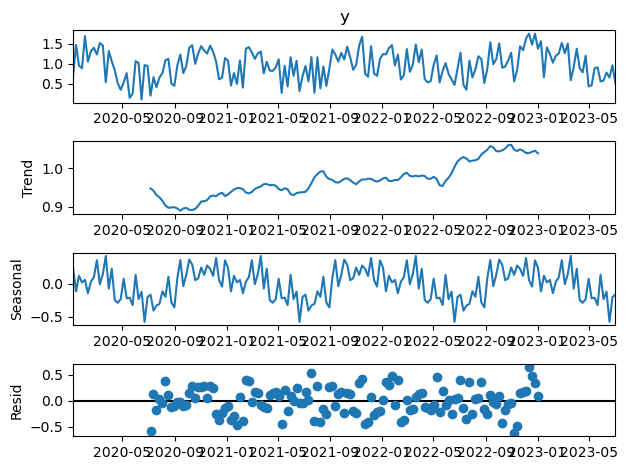

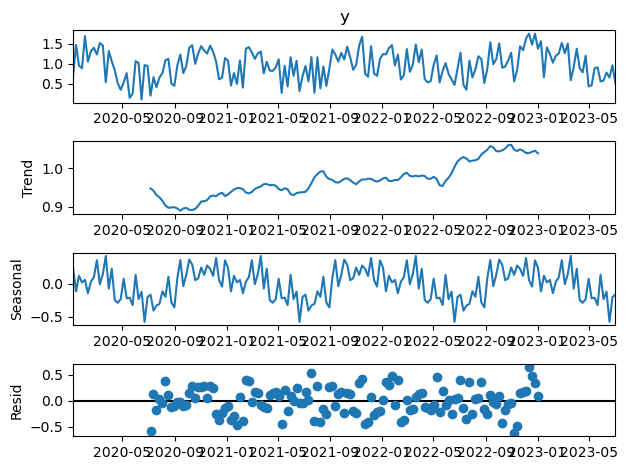

In [8]:
results.plot()

In [9]:
print(results)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

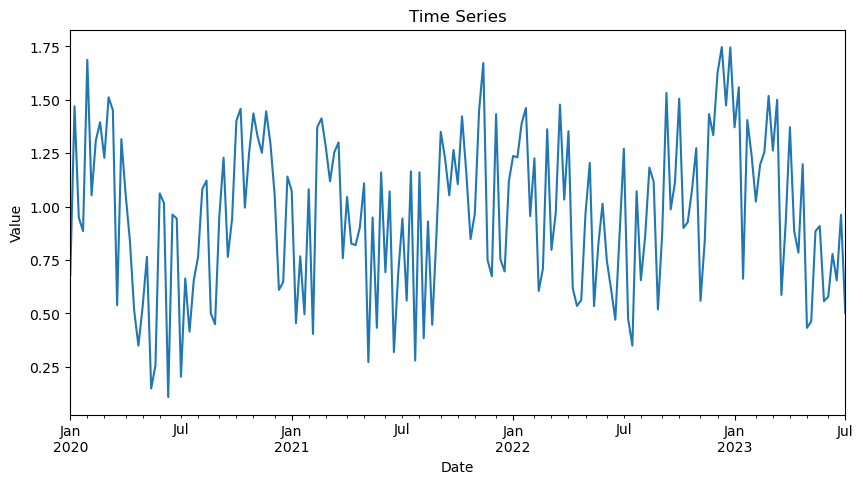

In [12]:
# Plot the time series
plt.figure(figsize=(10, 5))
df_arima['y'].plot()
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

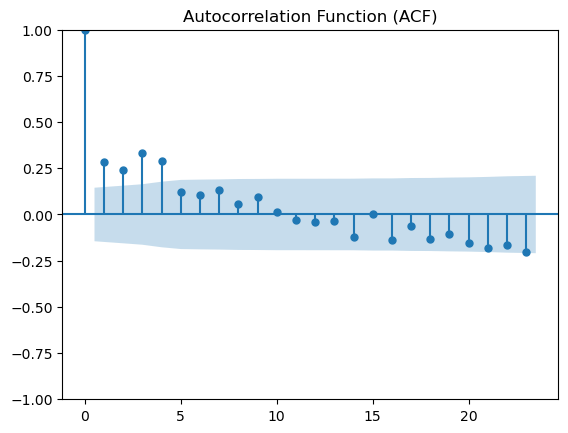

C:\Users\serale\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


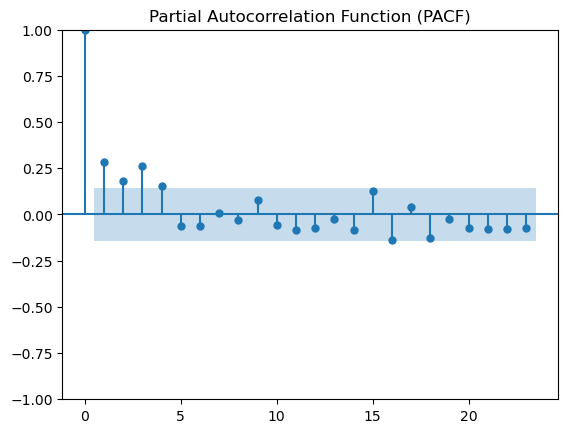

In [15]:
# Plot ACF and PACF to determine ARIMA parameters
plot_acf(df_arima['y'])
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(df_arima['y'])
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [17]:
# Fit ARIMA model
order = (1, 1, 1)  # ARIMA(p, d, q) parameters
model = ARIMA(df_arima['y'], order=order)
fit_model = model.fit()

C:\Users\serale\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
C:\Users\serale\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
C:\Users\serale\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [18]:
# Print model summary
print(fit_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  183
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -65.209
Date:                Mon, 22 Apr 2024   AIC                            136.417
Time:                        13:05:47   BIC                            146.029
Sample:                    01-06-2020   HQIC                           140.314
                         - 07-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0507      0.104     -0.488      0.626      -0.255       0.153
ma.L1         -0.7277      0.075     -9.699      0.000      -0.875      -0.581
sigma2         0.1193      0.016      7.494      0.0

In [19]:
# Forecast
forecast_steps = 10
forecast = fit_model.forecast(steps=forecast_steps)

In [25]:
forecast

2023-07-10    0.715845
2023-07-17    0.705015
2023-07-24    0.705564
2023-07-31    0.705536
2023-08-07    0.705538
2023-08-14    0.705538
2023-08-21    0.705538
2023-08-28    0.705538
2023-09-04    0.705538
2023-09-11    0.705538
Freq: W-MON, Name: predicted_mean, dtype: float64

In [26]:
df_arima

,y
ds,
2020-01-06,0.680314
2020-01-13,1.469124
2020-01-20,0.948362
2020-01-27,0.885640
2020-02-03,1.686237
...,...
2023-06-05,0.578091
2023-06-12,0.778230
2023-06-19,0.654510


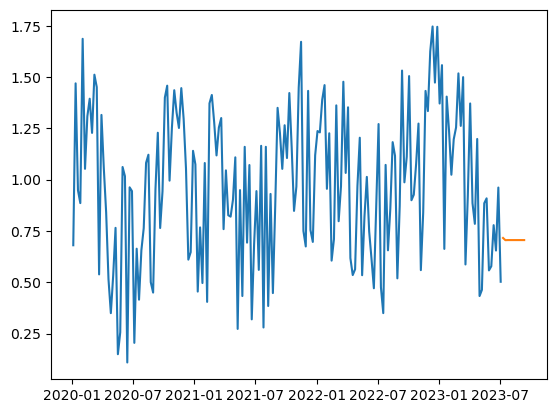

In [28]:
plt.plot(df_arima)
plt.plot(forecast)

https://stackoverflow.com/questions/62100701/forecasting-prediction-using-arima-in-python-how-does-it-work